In [1]:
## Digits

In [2]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from gympy.layers import Linear, Relu, Sigmoid, Softmax, Tanh
from gympy.networks import NeuralNetwork
from gympy.optimizers import GradientDescent
from gympy.loss import CategoricalCrossEntropy
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
digits = load_digits()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
X_train.shape

(1347, 64)

In [5]:
Y = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1,1)).T
Y.shape

(10, 1347)

In [6]:
X = StandardScaler().fit_transform(X_train).T
print(X.shape)


(64, 1347)


In [7]:

n_iter=390
model = NeuralNetwork(
    layers = [
        Tanh(n_input=64, n_output=32, dropout_rate=0.3),
        Softmax(n_input=32, n_output=10)
    ],
    optimizer = GradientDescent(learning_rate=1e-2),
    loss = CategoricalCrossEntropy(),
    n_iter=n_iter
)

In [8]:
tt = model.forward(X[:,0:1])
tt

array([[0.09987444],
       [0.10089726],
       [0.10082238],
       [0.09975926],
       [0.10172518],
       [0.09995301],
       [0.09755281],
       [0.09967228],
       [0.10025527],
       [0.09948813]])

In [9]:
yy = Y[:,0:1]
yy

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [10]:
np.log(0.5)

-0.6931471805599453

In [11]:
CategoricalCrossEntropy().forward(tt, Y[:,0:1])

2.304995414201433

0 cost 2.3039864501522533
200 cost 2.2498637196366733
400 cost 1.9720458699183507
600 cost 1.4064142986040966
800 cost 1.17710442492456
1000 cost 0.8329953073520613
1200 cost 0.6650996557612456
1400 cost 0.5702256100347528
1600 cost 0.35955872839183084
1800 cost 0.5549538278776175
2000 cost 0.4123014832278032
2200 cost 0.21219825441700424
2400 cost 0.2925570634518056
2600 cost 0.19904910152513447
2800 cost 0.3030091530020724
3000 cost 0.2541814998568521
3200 cost 0.2274447669639312
3400 cost 0.27139205203232575
3600 cost 0.15690799513455572
3800 cost 0.11880981358902919
4000 cost 0.1201646999424598
4200 cost 0.08842974532147357
4400 cost 0.11331031082936976
4600 cost 0.11614029416132057
4800 cost 0.12517918977750436


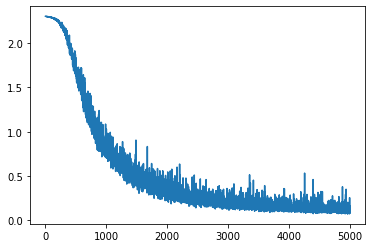

In [12]:
n_iter=5000
model.train(X,Y, show=200, n_iter=n_iter)
plt.plot(np.arange(n_iter), model.cost)

In [13]:
model.forward(X[:,[453]])

array([[9.93717158e-05],
       [9.46374617e-01],
       [1.63218530e-04],
       [7.25360908e-04],
       [3.01077672e-02],
       [2.85723155e-04],
       [4.90395610e-05],
       [4.05093961e-03],
       [3.57776736e-03],
       [1.45661953e-02]])

In [14]:
test_idx = np.random.choice(X.shape[1],16, replace=False)

In [15]:
prob = model.forward(X[:,test_idx])
pred = np.argmax(prob,axis=0)

true_vals = np.argmax(Y[:,test_idx], axis=0)

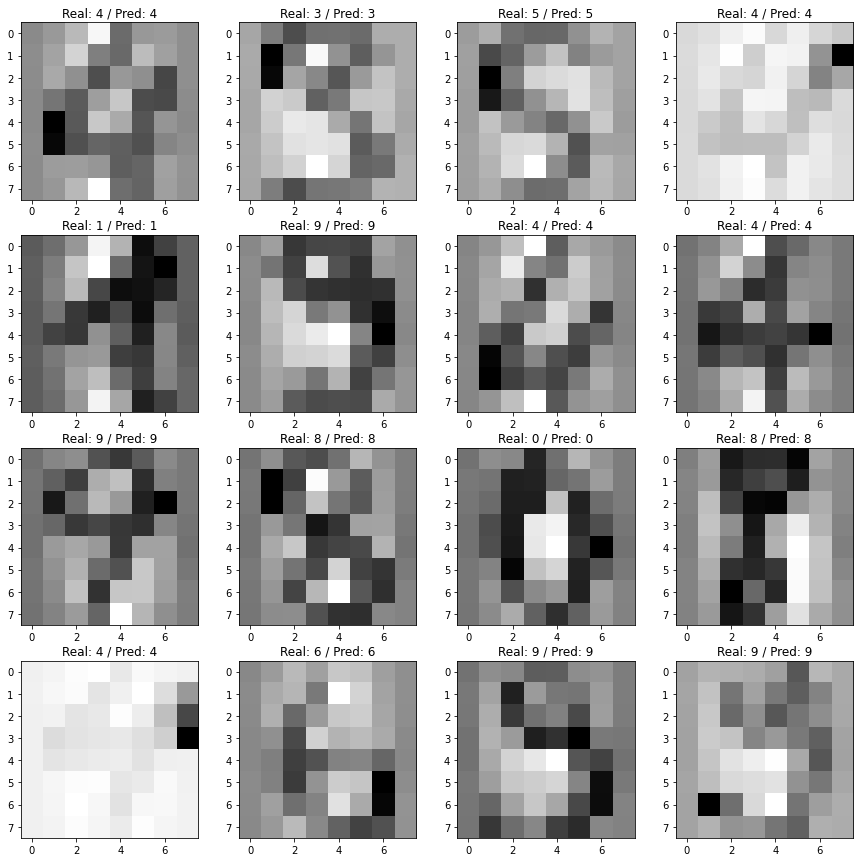

In [16]:
fig, axes = plt.subplots(4,4, figsize=(15,15))

for i,(idx, ax) in enumerate(zip(test_idx, axes.flatten())):
    ax.imshow(X[:,idx].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Real: {true_vals[i]} / Pred: {pred[i]}')